In [106]:
orig_values.T.shape

(34101, 140)

In [112]:
import pandas as pd
import numpy as np
import scanpy as sc

# Read the data
data = pd.read_csv("~/Downloads/data_combine_test.csv")


# Intensity data (A_ij)
data_anb = data
orig_values = data_anb.values.T
orig_values_metadata = pd.DataFrame({"CellID": range(1, data_anb.shape[0] + 1)})

# Create AnnData object
adata = sc.AnnData(X=orig_values.T)



# Assuming `adata` is your AnnData object
adata.X = adata.X.astype(np.float32)  # Convert to float32 for efficiency, or float64 if needed


In [113]:
adata.X.shape

(34101, 20)

In [114]:

# If counts_per_cell is calculated and used, ensure it's also float
if 'counts_per_cell' in locals() or 'counts_per_cell' in globals():
    counts_per_cell = counts_per_cell.astype(np.float64)



In [115]:
# Normalize the data per cell (you can control the filtering here)
sc.pp.normalize_per_cell(adata, min_counts=0)  # Set min_counts to None to avoid filtering

In [116]:
sc.pp.highly_variable_genes(adata, n_top_genes=500)
sc.pp.scale(adata, max_value=10)

In [117]:

# PCA
sc.tl.pca(adata, n_comps=19)

# UMAP
sc.pp.neighbors(adata, n_pcs=2)
sc.tl.umap(adata, n_components=2)

# Leiden clustering
sc.tl.leiden(adata, resolution=0.01)  # Adjust resolution as needed

# Print the results
print(adata.obs['leiden'])


0        0
1        0
2        0
3        0
4        0
        ..
34096    1
34097    1
34098    1
34099    1
34100    1
Name: leiden, Length: 34101, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']


In [119]:
# Leiden clustering
sc.tl.leiden(adata, resolution=0.05)  # Adjust resolution as needed

# Print the results
print(adata.obs['leiden'])

0        0
1        0
2        0
3        0
4        0
        ..
34096    1
34097    1
34098    1
34099    1
34100    1
Name: leiden, Length: 34101, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']


In [120]:
import scanpy as sc

# Assuming 'adata' is your AnnData object
cluster_counts = adata.obs['leiden'].value_counts()
print(cluster_counts)

leiden
0     28202
1      4687
2       308
3       205
4       188
5        71
6        61
7        53
8        45
9        44
10       43
11       42
12       36
13       35
14       32
15       30
16       13
17        6
Name: count, dtype: int64


/Users/khoahuynh/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


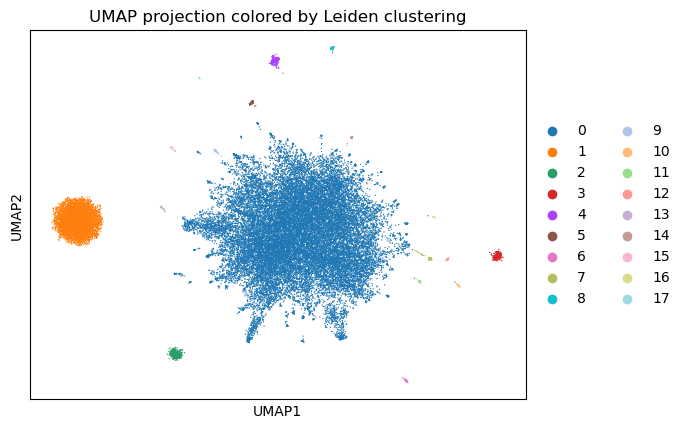

In [121]:
# Plot UMAP
sc.pl.umap(adata, color='leiden', title='UMAP projection colored by Leiden clustering')

In [89]:
# Find clusters with fewer than 100 cells
small_clusters = cluster_counts[cluster_counts < 100].index

# Replace these cluster labels with 'Others'
adata.obs['leiden'] = adata.obs['leiden'].apply(lambda x: 'Others' if x in small_clusters else x)

/Users/khoahuynh/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


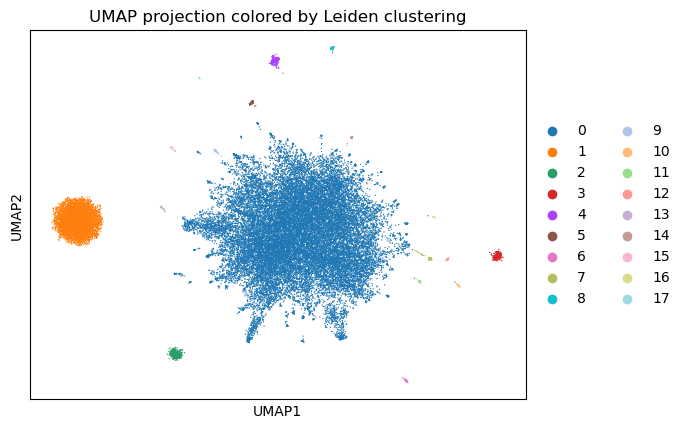

In [122]:
# Plot UMAP
sc.pl.umap(adata, color='leiden', title='UMAP projection colored by Leiden clustering')

In [123]:
adata.obs[['leiden']].to_csv("~/Downloads/leiden_clustering_test.csv", index=True)